Nome: Vinícius Esperança Mantovani

RA:247395

Curso: Engenharia De Computação



# Ex04 - Filtragem de Imagens

Nesta atividade vamos entender a operação de convolução e o uso da mesma para filtragem de imagens. Testaremos o uso de **filtros suavizantes**, usados para a remoção de ruído, e **filtros aguçantes**, usados para detecção de bordas.  

- **Filtros suavizantes:** são aqueles que removem a nitidez da imagem fazendo uma média, aritmética ou ponderada, na janela do núcleo. O filtro ponderado suavizante mais comum é o da gaussiana. Filtros suavizantes são muito utilizados para eliminar ruído de uma imagem.

- **Filtros aguçantes:** são aqueles que realçam as bordas da imagem. Alguns dos filtros aguçantes comuns são: Filtro de Sobel, Filtro de Prewitt, Filtro Laplaciano.

Veja mais no notebook sobre [Filtragem no domínio espacial](https://github.com/lrittner/Computacao-Visual/blob/master/tutoriais/07_Filtragem_no_dominio_espacial.ipynb)

In [ ]:
# Importando as bibliotecas que serão utilizadas
import numpy as np
import matplotlib.image as mpimg
from PIL import Image
import matplotlib.pyplot as plt
import random

# Definindo o nome da pasta compartilhada
# IMPORTANTE: substitua "NOME_DA_PASTA_COMPARTILHADA" abaixo pelo nome correspondente
pasta_compartilhada = "G_EA979A_2024S1"

In [ ]:
# Conexão do colab com o drive
from google.colab import drive
drive.mount('/content/gdrive')
path = f"gdrive/MyDrive/{pasta_compartilhada}/Dados/Ex04/"

Mounted at /content/gdrive


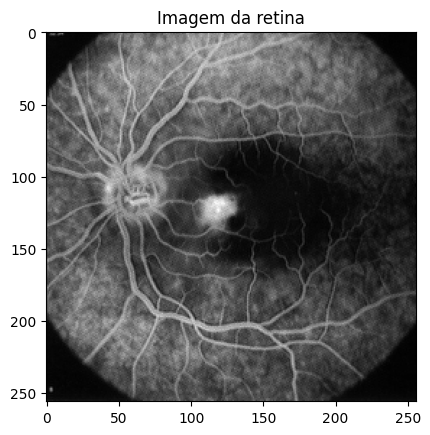

In [ ]:
%matplotlib inline
f = mpimg.imread(path+'retina.tif')
plt.title('Imagem da retina')
plt.imshow(f,cmap='gray')

**ATENÇÃO** - as operações de filtragem alteram os valores e eles podem sair da faixa de 0 a 255. Portanto, fique atento à maneira como você está realizando as operações e visualizando os resultados. Algumas dicas:

- Uma boa prática é realizar as operações em ponto flutuante;
- Quando a visualização não corresponde ao esperado, desconfie que os valores sairam da escala e que os valores, de alguma maneira, estão sendo truncados.

## Parte 1 - Operação de convolução e filtro da média

### Exercício 1.1

Entenda o uso da operação de convolução e experimente usá-la para entender o filtro da média. Siga o seguinte roteiro:
- Crie uma imagem numérica pequena (7x7, por exemplo), crie um filtro de média (kernel 3x3) e use a função **convolve()** da biblioteca **scipy.ndimage** para realizar a filtragem. Verifique numericamente que a filtragem está correta;
- Repita a operação de filtragem na imagem da retina e visualize o resultado;
- Faça experimentos com a imagem da retina variando o tamanho do filtro e compare as imagens resultantes;
- Não se esqueça de comentar os métodos utilizados e resultados obtidos.

[[1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]]

 [[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]

 [[1.         1.         1.         1.         1.         1.
  1.        ]
 [1.         0.88888889 0.77777778 0.66666667 0.77777778 0.88888889
  1.        ]
 [1.         0.77777778 0.55555556 0.33333333 0.55555556 0.77777778
  1.        ]
 [1.         0.66666667 0.33333333 0.         0.33333333 0.66666667
  1.        ]
 [1.         0.77777778 0.55555556 0.33333333 0.55555556 0.77777778
  1.        ]
 [1.         0.88888889 0.77777778 0.66666667 0.77777778 0.88888889
  1.        ]
 [1.         1.         1.         1.         1.         1.
  1.        ]]


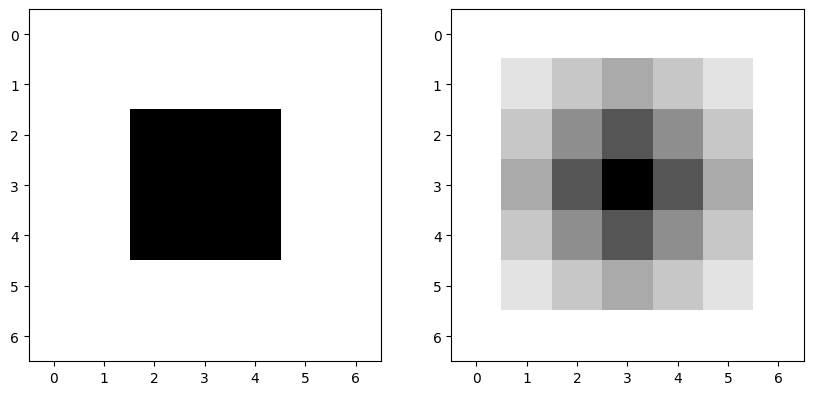

In [ ]:
#Neste exercicio, usou-se como metodo exatamente o roteiro disposto acima,
# no entanto, vale indicar que:
# - a imagem usada eh formada por zeros e uns, sendo um quadrado branco com
# um quadrado preto no meio;
# - o filtro usado foi um filtro de media composto inteiramente por uns.
#Vale indicar ainda, que a funcao de convolucao utilizada para aplicar o filtro,
# tem como padrao o modo de reflexo para as bordas, espelhando simetricamente os
# pixel do interior para compor o exterior da imagem, conforme: d c b a | a b c d.

from scipy import ndimage as ndimg

#teste com imagem criada ____________________________
image_array = np.ones([7,7])
image_array[2:5, 2:5] = 0
print(image_array)
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(image_array, cmap='gray')

filter = np.ones([3,3])/9
print("\n",filter)

print('\n',ndimg.convolve(image_array, filter))
plt.subplot(1,2,2)
plt.imshow(ndimg.convolve(image_array, filter), cmap='gray')


 [[14 18 40 ...  7  7  6]
 [ 8  8 27 ...  1  2  2]
 [10 14 41 ...  3  4  4]
 ...
 [12 12 14 ...  8 10  6]
 [14 14 13 ... 11 11  9]
 [21 25 23 ... 16 14 16]]

 [[12 20 45 ...  4  4  4]
 [11 20 44 ...  3  4  4]
 [ 8 14 32 ...  2  2  3]
 ...
 [11 12 12 ...  8  8  8]
 [16 16 17 ... 11 11 10]
 [19 19 20 ... 13 13 13]] 



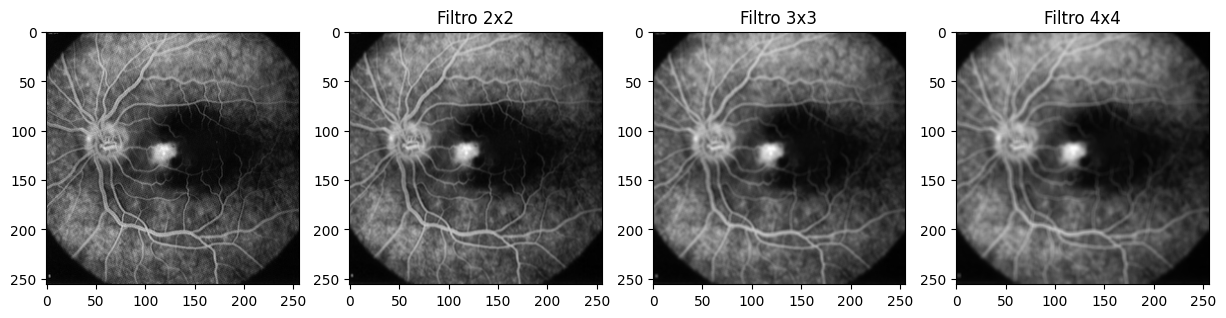

In [ ]:
#teste com retina ____________________________________
# Neste teste, foram usados filtros 2x2, 3x3 e 4x4, todos
# de media e, notou-se que, quanto maior a dimensao do filtro,
# maior o efeito de borramento da imagem.
filter1 = np.ones([3,3])/9
print('\n',f)
plt.figure(figsize=(15,15))
plt.subplot(1,4,1)
plt.imshow(f,cmap='gray')
print('\n',ndimg.convolve(f, filter1), '\n')
plt.subplot(1,4,3)
plt.title('Filtro 3x3')
plt.imshow(ndimg.convolve(f, filter1), cmap='gray')
filter2 = np.ones([2,2])/4
plt.subplot(1,4,2)
plt.title('Filtro 2x2')
plt.imshow(ndimg.convolve(f, filter2), cmap='gray')
filter3 = np.ones([4,4])/16
plt.subplot(1,4,4)
plt.title('Filtro 4x4')
plt.imshow(ndimg.convolve(f, filter3), cmap='gray')

### Exercício 1.2

Repita a operação de filtragem, desta vez variando também o modo de tratamento de borda da função **convolve()** - '*reflect*', '*constant*', '*nearest*', '*mirror*', '*wrap*' - explicando as diferenças encontradas. Dica, você só conseguirá visualizar as diferenças se aumentar o tamanho da máscara (filtro).

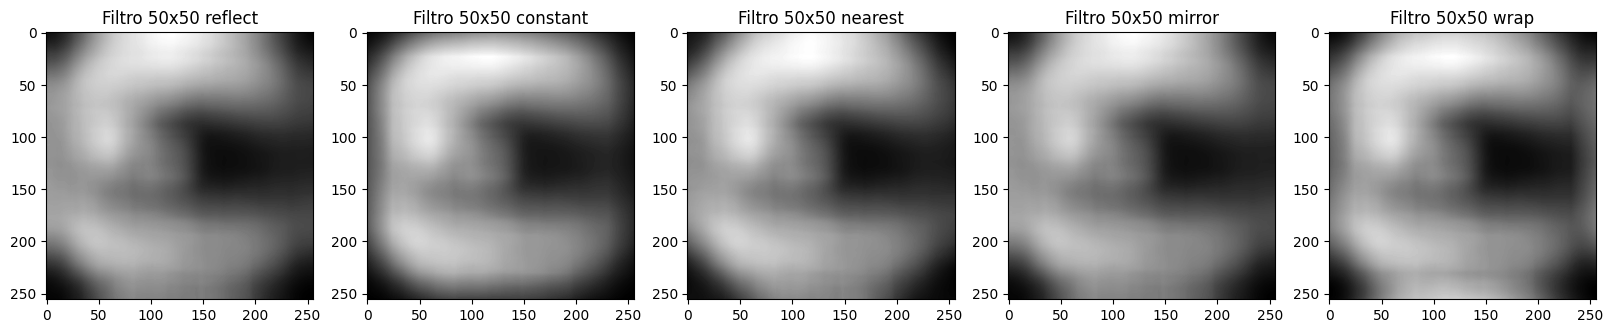

In [ ]:
# Analisando as bordas em cada um dos modos de filtragem, nota-se algumas diferencas,
# principalmente na borda da esquerda (mais facil de notar). Para explicar tais
# diferencas, analisemos filtro-a-filtro. Por este caminho, nota-se na filtragem
# com modo "reflect", por conta da borda ser simetricamente espelhada para na ex-
# pancao, temos, nesta borda, um espelhamento do circulo claro da imagem, de forma
# que, quase que imediatamente antes do limite esquerdo da imagem, temos o inicio
# de um circulo de centro para a esquerda. Já no segundo caso, convoluindo no
# modo constant, temos um achatamento do contorno do circulo que compoe a retina.
# Isso ocorre, porque, neste modo de convolucao, os pixels imaginarios para fora
# da borda sao preenchidos todos com um mesmo valor constante e, neste caso, como
# cval nao foi determinado explicitamente na chamada da funcao, o valor desses
# pixels eh de 0, o que implicou um escurecimento das bordas, achatando, por
# consequencia as bordas do circulo. Seguindo, para o terceiro caso (nearest),
# ve-se que o contorno do circulo eh melhor presevado quando comparado com ambos
# os casos anteriores, uma vez que, neste caso, temos uma replicacao dos pixels
# mais proximos da borda da imagem para compor os pixels que nao existem do lado
# de fora da borda. Desse modo, em cada ponto da borda, temos uma aproximacao que
# pende a um valor proximo ao valor imediatamente anterior a ela, fazendo com que
# tenhamos, na imagem que usamos, uma melhor manutencao da forma da figura apesar
# do embacamento da imagem. Ademais, temos a convolucao com preenchimento externo
# do tipo mirror, neste caso, notamos um efeito semelhante ao que ocorre no modo
# reflect. Isso se da, porque no modo mirror, temos o preenchimento semelhante
# aquele feito no reflect, uma vez que no primeiro, a reflexao tem como centro o
# pixel imediatamente anterior a borda (mirror → d c b | a b c d | c b a),
# enquanto que, no segundo, o reflexo eh posterior ao ultimo pixel, ou seja, o
# "eixo" eh a propria borda. Por fim, no caso de convolucao com modo wrap, temos
# um efeito minimamente parecido com o do constant, em que temos as partes da
# imagem proximas a borda um pouco escurecidas, no entanto, neste modo o efeito
# eh mais sigelo. Isso se passa, pois, em tal modo, o ultimo pixel na extremidade
# da imagem, eh tambem o ultimo pixel "criado" para fora da borda para convolucao.
# Dessa maneira, acabamos usando pixels mais escuros da imagem na media feita
# pelo filtro, causando esse escurecimento nas bordas.
#
#

#reflect
plt.figure(figsize=(20,20))
filter3 = np.ones([50,50])/2500
plt.subplot(1,5,1)
plt.title('Filtro 50x50 reflect')
plt.imshow(ndimg.convolve(f, filter3), cmap='gray')

#constant
filter3 = np.ones([50,50])/2500
plt.subplot(1,5,2)
plt.title('Filtro 50x50 constant')
plt.imshow(ndimg.convolve(f, filter3, mode='constant'), cmap='gray')

#nearest
filter3 = np.ones([50,50])/2500
plt.subplot(1,5,3)
plt.title('Filtro 50x50 nearest')
plt.imshow(ndimg.convolve(f, filter3, mode='nearest'), cmap='gray')

#mirror
filter3 = np.ones([50,50])/2500
plt.subplot(1,5,4)
plt.title('Filtro 50x50 mirror')
plt.imshow(ndimg.convolve(f, filter3, mode='mirror'), cmap='gray')

#wrap
filter3 = np.ones([50,50])/2500
plt.subplot(1,5,5)
plt.title('Filtro 50x50 wrap')
plt.imshow(ndimg.convolve(f, filter3, mode='wrap'), cmap='gray')

## Parte 2 - Filtro gaussiano e redução de ruído

### Exercício 2.1

Teste a propriedade de decomposição das máscaras da convolução, ou seja, crie um filtro gaussiano bi-dimensional (3,3) a partir de 2 filtros unidimensionais (3,1) e (1,3). Crie também o filtro bi-dimensional diretamente e cheque se os resultados são equivalentes. Comente os métodos utilizados.

starting x
 [[-1.  0.  1.]
 [-1.  0.  1.]
 [-1.  0.  1.]] 

starting y
 [[-1. -1. -1.]
 [ 0.  0.  0.]
 [ 1.  1.  1.]] 

x_filter
 [[0.27406862 0.45186276 0.27406862]
 [0.27406862 0.45186276 0.27406862]
 [0.27406862 0.45186276 0.27406862]] 

y_filter
 [[0.09135621 0.09135621 0.09135621]
 [0.15062092 0.15062092 0.15062092]
 [0.09135621 0.09135621 0.09135621]] 

resultant filter
 [[0.07511361 0.1238414  0.07511361]
 [0.1238414  0.20417996 0.1238414 ]
 [0.07511361 0.1238414  0.07511361]] 

kernel=
 [[0.07511361 0.1238414  0.07511361]
 [0.1238414  0.20417996 0.1238414 ]
 [0.07511361 0.1238414  0.07511361]] 

subtracao gauss direto - gauss dois filtros
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


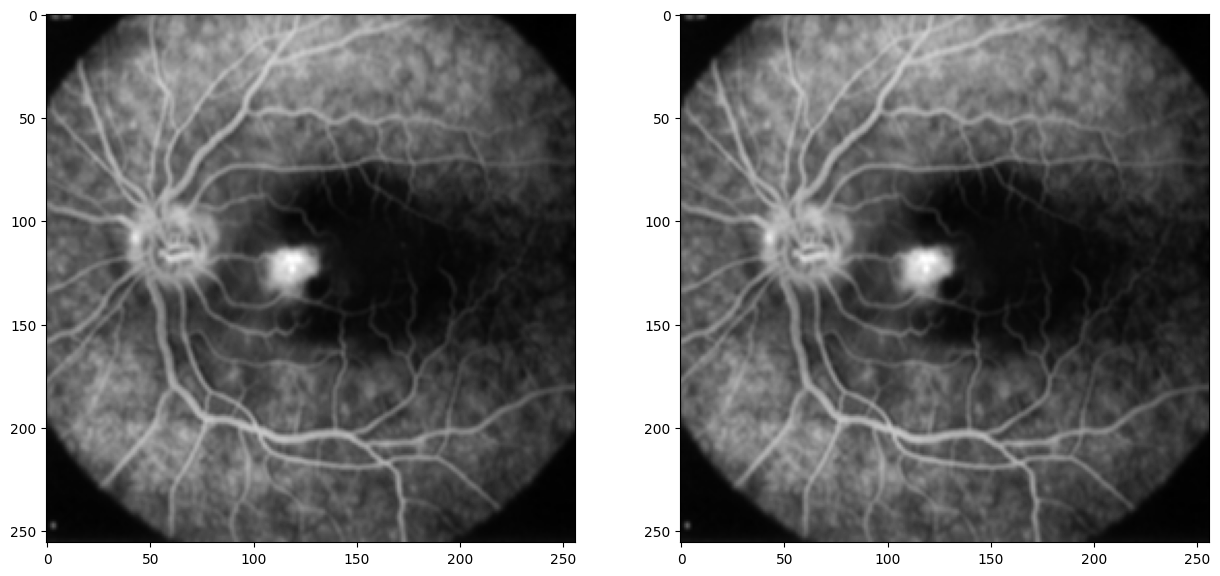

In [ ]:
# Neste exercicio, foi criado um filtro 2d inicialmente usando dois filtros 1d
# multiplicados. Em seguida, para comparar os resultados, foi criado um filtro
# gaussiano diretamente, sem o processo de criacao dos dois filtros. Analisando
# ambos os resultados, nota-se que o array resultante de ambas as convolucoes
# sao iguais (conforme se observa na subtracao printada ao final do exercicio).
# Alem disso, pelas imagens, eh possivel notar que nao parece haver diferencas.
x, y = np.meshgrid(np.linspace(-1,1,3), np.linspace(-1,1,3))
print("starting x\n",x, "\n")
print("starting y\n",y, "\n")
sigma = 1.
x_prelim = (np.exp(-x*x/2*(sigma**2)))/(2.*np.pi*sigma**2)
x_filter = 3*x_prelim/np.sum(x_prelim)
print("x_filter\n",x_filter, "\n")
y_prelim = np.exp(-y*y/(2.*sigma**2))
y_filter = y_prelim/np.sum(y_prelim)
print("y_filter\n",y_filter, "\n")

#print do produto dos filtros (para comparacao e validacao)
print("resultant filter\n",np.matmul(y_filter, x_filter), "\n")

#imagens do processo com unidimensionais
plt.figure(figsize=(15,15))
img_gauss1d = ndimg.convolve(f, np.matmul(y_filter, x_filter))
plt.subplot(1, 2, 1)
plt.imshow(img_gauss1d, cmap='gray')

x, y = np.meshgrid(np.linspace(-1,1,3), np.linspace(-1,1,3))
d = x*x+y*y
sigma = 1.
gauss = (1./(2.*np.pi*sigma**2)) * np.exp(-d/(2.*sigma**2))
gauss = gauss/gauss.sum() # normalização
print('kernel=\n', gauss, "\n")
plt.subplot(1, 2, 2)
plt.imshow(ndimg.convolve(f, gauss), cmap='gray')

print("subtracao gauss direto - gauss dois filtros\n", (ndimg.convolve(f, gauss) - img_gauss1d))


### Exercício 2.2

Teste a aplicação de filtros suavizantes para redução de ruído: Adicione ruído gaussiano à imagem da retina (sugestão: use **np.random**) e depois tente remover o ruído com o filtro da média e com o filtro gaussiano. Você pode aumentar os filtros se quiser. Comente os métodos utilizados e resultados obtidos.

Text(0.5, 1.0, 'RUIDOSA COM GAUSSIANA 9X9\ne sigma 0.5')

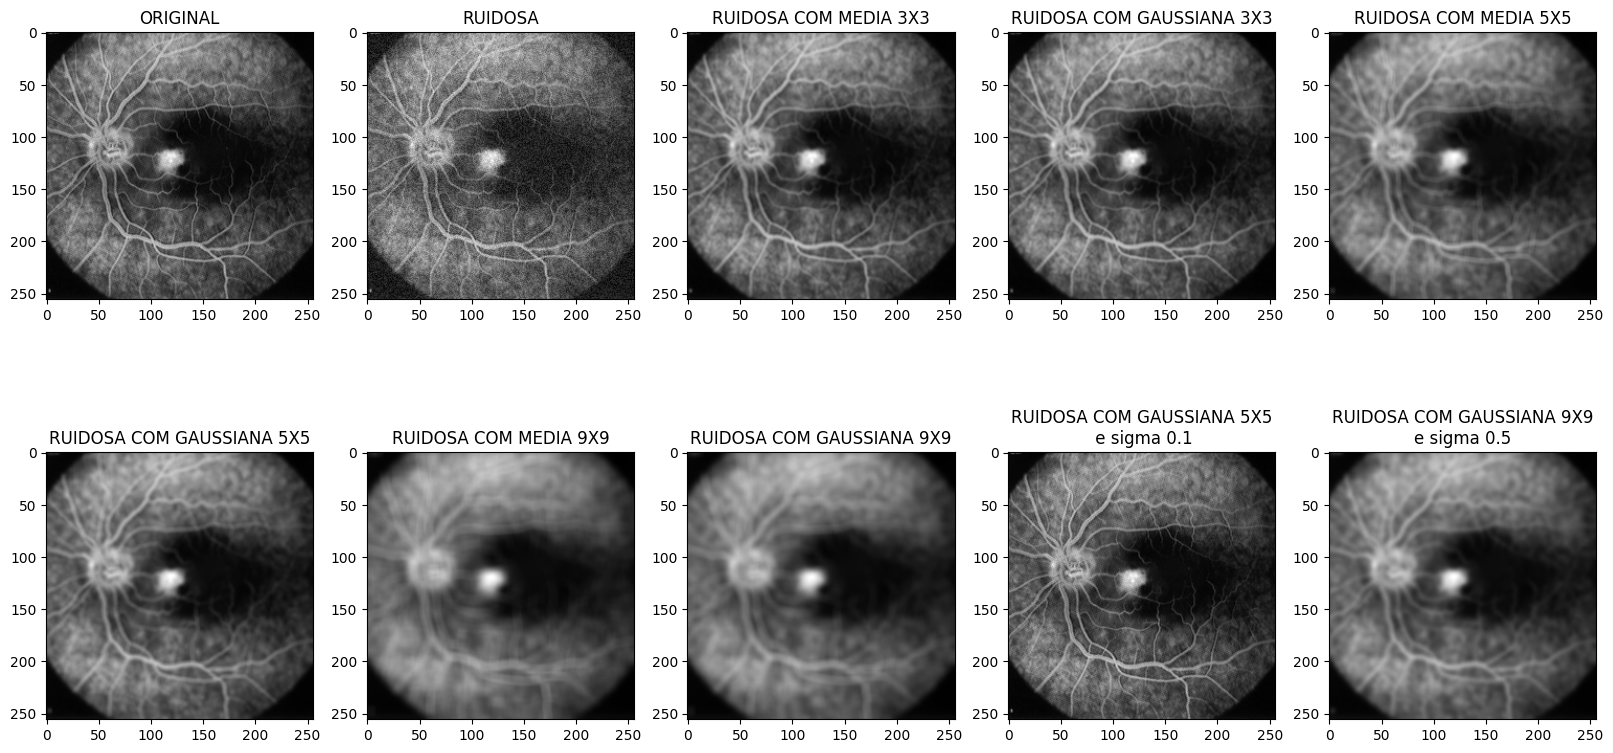

In [ ]:
#Neste execicio, foi criado um ruido usando np.random e somado a imagem.
# Assim, prosseguindo com a aplicacao de filtros, foram usados os seguintes:
# - de media: 3x3, 5x5, 9x9
# - de gauss: 3x3, 5x5, 9x9
# comparando-os, conforme se esperava, eh possivel notar que ambos borram a
# imagem e suprimem o ruido criado, no entanto, nesses casos testados as imagens
# sao muito semelhantes. Por esse motivo, testou-se valores diferentes de sigma e,
# notou-se que, para valores menores de sigma (por exemplo 0.1 e 0.5) testados,
# o filtro de gauss borra consideravelmente menos que o de media e cumpre o mesmo
# papel de supressao de ruidos.

#introduzindo ruidos:
pic_ruido = np.random.rand(256,256)*50
img = f + pic_ruido

#imagem original
plt.figure(figsize=(20,10))
plt.subplot(2,5,1)
plt.imshow(f, cmap='gray')
plt.title('ORIGINAL')

#imagem ruidosa
plt.subplot(2,5,2)
plt.imshow(img, cmap='gray')
plt.title('RUIDOSA')

#imagem ruidosa tratada com media
media = np.ones([3,3])/np.sum(np.ones([3,3]))
plt.subplot(2,5,3)
plt.imshow(ndimg.convolve(f, media), cmap='gray')
plt.title('RUIDOSA COM MEDIA 3X3')

#definindo proximo filtro gauss (dimesao)
x, y = np.meshgrid(np.linspace(-1,1,3), np.linspace(-1,1,3))
d = x*x+y*y
sigma = 1.
gauss = (1./(2.*np.pi*sigma**2)) * np.exp(-d/(2.*sigma**2))
gauss = gauss/gauss.sum() # normalização

#imagem ruidosa tratada com gauss
plt.subplot(2,5,4)
plt.imshow(ndimg.convolve(f, gauss), cmap='gray')
plt.title('RUIDOSA COM GAUSSIANA 3X3')

#imagem ruidosa tratada com media
media = np.ones([5,5])/np.sum(np.ones([5,5]))
plt.subplot(2,5,5)
plt.imshow(ndimg.convolve(f, media), cmap='gray')
plt.title('RUIDOSA COM MEDIA 5X5')

#definindo proximo filtro gauss (dimesao)
x, y = np.meshgrid(np.linspace(-1,1,5), np.linspace(-1,1,5))
d = x*x+y*y
sigma = 1.
gauss = (1./(2.*np.pi*sigma**2)) * np.exp(-d/(2.*sigma**2))
gauss = gauss/gauss.sum() # normalização

#imagem ruidosa tratada com gauss
plt.subplot(2,5,6)
plt.imshow(ndimg.convolve(f, gauss), cmap='gray')
plt.title('RUIDOSA COM GAUSSIANA 5X5')

#imagem ruidosa tratada com media
media = np.ones([9,9])/np.sum(np.ones([9,9]))
plt.subplot(2,5,7)
plt.imshow(ndimg.convolve(f, media), cmap='gray')
plt.title('RUIDOSA COM MEDIA 9X9')

#definindo proximo filtro gauss (dimesao)
x, y = np.meshgrid(np.linspace(-1,1,9), np.linspace(-1,1,9))
d = x*x+y*y
sigma = 1.
gauss = (1./(2.*np.pi*sigma**2)) * np.exp(-d/(2.*sigma**2))
gauss = gauss/gauss.sum() # normalização

#imagem ruidosa tratada com gauss
plt.subplot(2,5,8)
plt.imshow(ndimg.convolve(f, gauss), cmap='gray')
plt.title('RUIDOSA COM GAUSSIANA 9X9')

#imagem ruidosa tratada com media
media = np.ones([5,5])/np.sum(np.ones([5,5]))
plt.subplot(2,5,5)
plt.imshow(ndimg.convolve(f, media), cmap='gray')
plt.title('RUIDOSA COM MEDIA 5X5')

#testes para sigmas menores
x, y = np.meshgrid(np.linspace(-1,1,5), np.linspace(-1,1,5))
d = x*x+y*y
sigma = 0.1
gauss = (1./(2.*np.pi*sigma**2)) * np.exp(-d/(2.*sigma**2))
gauss = gauss/gauss.sum() # normalização
plt.subplot(2,5,9)
plt.imshow(ndimg.convolve(f, gauss), cmap='gray')
plt.title('RUIDOSA COM GAUSSIANA 5X5\n e sigma 0.1')

x, y = np.meshgrid(np.linspace(-1,1,9), np.linspace(-1,1,9))
d = x*x+y*y
sigma = 0.5
gauss = (1./(2.*np.pi*sigma**2)) * np.exp(-d/(2.*sigma**2))
gauss = gauss/gauss.sum() # normalização
plt.subplot(2,5,10)
plt.imshow(ndimg.convolve(f, gauss), cmap='gray')
plt.title('RUIDOSA COM GAUSSIANA 9X9\ne sigma 0.5')

## Parte 3 - Filtro de Sobel e detecção de bordas

Existem vários filtros que procuram realçar as bordas da imagem. Um dos mais conhecidos é o Operador Sobel, composto por uma máscara vertical (Sv) e uma máscara horizontal (Sh).

In [ ]:
Sv = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
print('Sv =\n',Sv)

Sh = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
print('Sh =\n',Sh)

Sv =
 [[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]
Sh =
 [[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


Para detectar bordas de uma imagem usando o Filtro de Sobel, precisamos fazer a filtragem da imagem usando tanto a máscara vertical, quanto a horizontal. No final, acabaremos com 2 imagens resultantes, uma reforçando as bordas verticais e outra reforçando as bordas horizontais, como exemplificado abaixo.

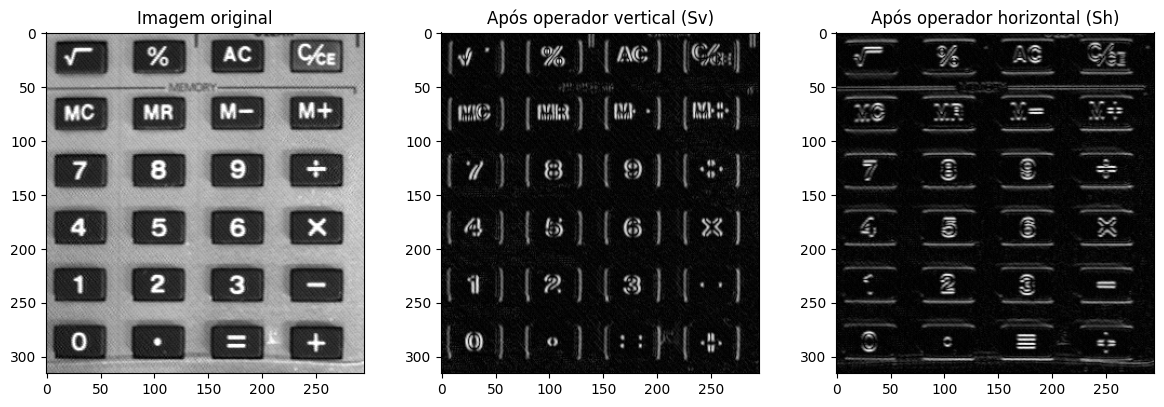

In [ ]:
img = mpimg.imread(path+'keyb.tif')
img_sv = mpimg.imread(path+'keyb_sv.tif')
img_sh = mpimg.imread(path+'keyb_sh.tif')

fig, axs = plt.subplots(1,3, figsize=(12, 4))
plt.tight_layout()

plt.subplot(131)
plt.imshow(img, cmap='gray')
plt.title('Imagem original')

plt.subplot(132)
plt.imshow(img_sv,cmap='gray')
plt.title('Após operador vertical (Sv)')

plt.subplot(133)
plt.imshow(img_sh,cmap='gray')
plt.title('Após operador horizontal (Sh)');

### Exercício 3.1 - Visualizando as bordas verticais e horizontais em 2 imagens separadas

Experimente filtrar as imagens abaixo com os Filtros de Sobel vertical e horizontal e visualize o resultado. Para cada imagem, você deve obter uma imagem fitrada pelo Filtro de Sobel vertical - **fv** - e uma imagem filtrada pelo Filtro de Sobel horizontal - **fh**. Comente sobre os resultados obtidos. As imagens geradas estão de acordo com o exemplo apresentado para a imagem da calculadora? Em caso negativo, explique o porquê e tente fazer com que as imagens fiquem mais semelhantes.

Text(0.5, 1.0, 'Imagem original')

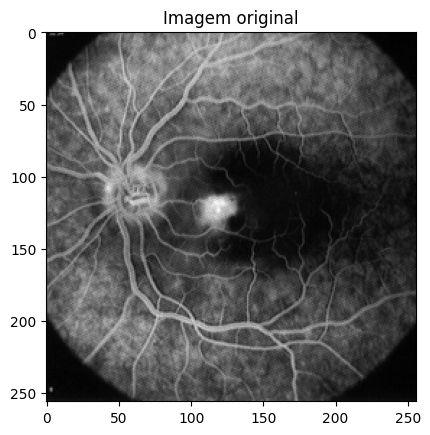

In [ ]:
img1 = mpimg.imread(path+'retina.tif')
plt.imshow(img1, cmap='gray')
plt.title("Imagem original")

[[19 51  8 ... 41 73 17]
 [12  4 24 ... 59 49 34]
 [ 5 13 24 ... 51 18  8]
 ...
 [13  3 13 ... 27 44 21]
 [30 13 14 ... 47 27 37]
 [59  8 51 ... 56 63 68]]
[[51 17  8 ... 11 11 15]
 [42  2 24 ... 39  3 36]
 [31  3  8 ... 35 18 42]
 ...
 [45 19 15 ... 15 18 85]
 [ 8 19  2 ... 23  5 57]
 [ 5  2 19 ... 14  5  0]]


Text(0.5, 1.0, 'Imagem Sobel horizontal melhora')

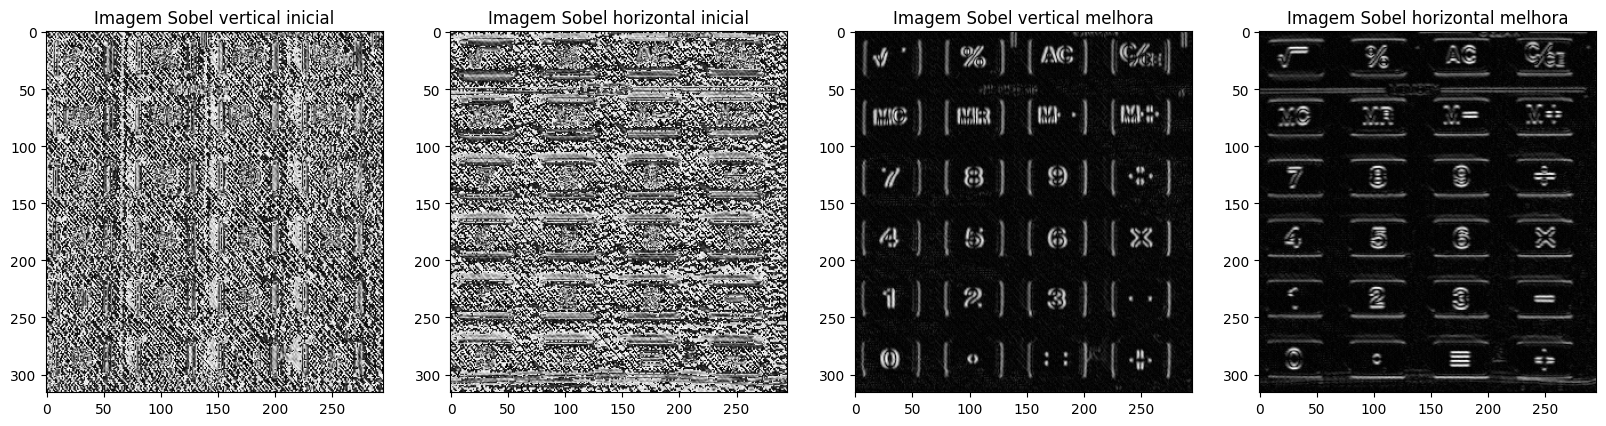

In [ ]:
# De comeco, para testar a corritude do filtro com aplicacao dos operadores,
# foi usada a imagem da calculadora e, notou-se que, no caso de apenas convoluirmos
# a imagem com os operadores, tem-se um resultado inesperado, tanto
# para a filtragem vertical como para a filtragem horizontal. Isso parece
# se dar por causa de os pixels assumirem valores maiores que 255 ou
# menores que 0 na convolucao. Isso faz com que os pixels assumam valores
# "circulares", ou seja, um pixel que passa de 255 por 30, por exemplo,
# passa a valer 30. Para resolver isso, é necesario garantir que eles nao
# passe de 255 nem de 0, o que eh feito apos a demonstracao dos casos
# errados. Apesar disso, ja eh possivel ver que as bordas estao, de fato, um
# pouco destacadas.
# O problema foi resolvido usando a matriz de absolutos da imagem filtrada,
# conforme se nota abaixo e, foi usada a conversao de tipo dos elementos da
# matriz da imagem para int.
# elementos da array.

# ATENCAO: A RESPOSTA DO EXERCICIO, COM A IMAGEM DA RETINA, ENCONTRA-SE NO
# PROXIMO BLOCO DE CODIGO ABAIXO.

plt.figure(figsize=(20,10))
img_aux = img.astype("int")
#---------------------------------------------------------
plt.subplot(1, 4, 1)
plt.imshow(ndimg.convolve(img, Sv), cmap='gray')
plt.title("Imagem Sobel vertical inicial")

plt.subplot(1, 4, 2)
plt.imshow(ndimg.convolve(img, Sh), cmap='gray')
plt.title("Imagem Sobel horizontal inicial")

#---------------------------------------------------------
plt.subplot(1, 4, 3)
result_v = ndimg.convolve(img_aux, Sv)
result_v = np.abs(result_v)
print(result_v)
plt.imshow(result_v, cmap='gray')
plt.title("Imagem Sobel vertical melhora")

plt.subplot(1, 4, 4)
result_h = ndimg.convolve(img_aux, Sh)
result_h = np.abs(result_h)
print(result_h)
plt.imshow(result_h, cmap='gray')
plt.title("Imagem Sobel horizontal melhora")

[[ 12  97 283 ...   7   2   3]
 [  8  95 295 ...   5   2   1]
 [  6  85 224 ...   4   4   0]
 ...
 [  3   5   2 ...   2   5   9]
 [  4   2   3 ...   1   6   6]
 [ 12   5   0 ...   1   2   4]]
[[ 28  39  31 ...  21  20  17]
 [ 16  11   9 ...  13  12   9]
 [  2  19 102 ...   4   4   4]
 ...
 [ 21  15  16 ...  18  13   7]
 [ 40  44  41 ...  25  26  34]
 [ 32  39  42 ...  15  18  24]]


Text(0.5, 1.0, 'Imagem Sobel horizontal melhora')

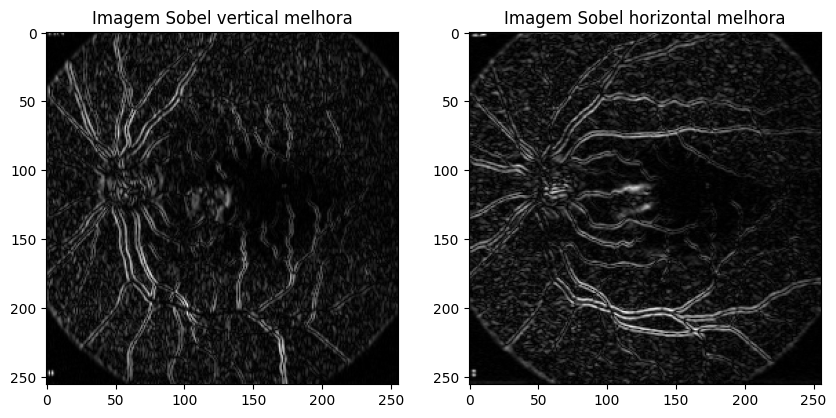

In [ ]:
# Abaixo esta feita a filtragem com ambos os operadores individualmente e,
# eh possivel notar que, apos as devidas correcoes, as imagens da retina
# estao destacando de maneira bastante satisfatoria e semelhante ao como
# sao mostradas as bordas da calculadora no exemplo.

plt.figure(figsize=(10,10))
img_aux = img1.astype("int")

plt.subplot(1, 2, 1)
result_v = ndimg.convolve(img_aux, Sv)
result_v = np.abs(result_v)
print(result_v)
plt.imshow(result_v, cmap='gray')
plt.title("Imagem Retina Sobel vertical")

plt.subplot(1, 2, 2)
result_h = ndimg.convolve(img_aux, Sh)
result_h = np.abs(result_h)
print(result_h)
plt.imshow(result_h, cmap='gray')
plt.title("Imagem Retina Sobel horizontal")

---

Text(0.5, 1.0, 'Imagem original')

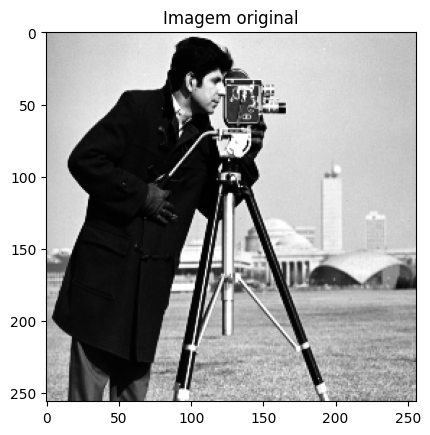

In [ ]:
img2 = mpimg.imread(path+'cameraman.tif')
plt.imshow(img2, cmap='gray')
plt.title("Imagem original")

[[  2  17  19 ...   5   5   6]
 [  8  10   2 ...   7   9   5]
 [ 18  11   6 ...   1  20  10]
 ...
 [  7  24  96 ...  93  58  83]
 [  8  64  41 ...  90  43 107]
 [  4  57  42 ... 172  19 130]]
[[22 21  9 ... 17 23 26]
 [16 20  8 ...  7  7  9]
 [14  7  2 ... 21 16 12]
 ...
 [25 12 24 ...  7 12  5]
 [40 58 31 ... 30 31 15]
 [64 35 28 ...  2 55 54]]


Text(0.5, 1.0, 'Imagem Retina Sobel horizontal')

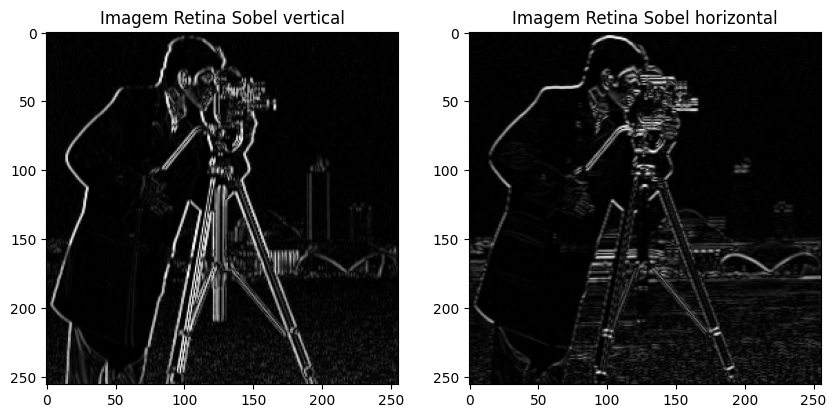

In [ ]:
plt.figure(figsize=(10,10))
img_aux = img2.astype("int")

plt.subplot(1, 2, 1)
result_v = ndimg.convolve(img_aux, Sv)
result_v = np.abs(result_v)
print(result_v)
plt.imshow(result_v, cmap='gray')
plt.title("Imagem Retina Sobel vertical")

plt.subplot(1, 2, 2)
result_h = ndimg.convolve(img_aux, Sh)
result_h = np.abs(result_h)
print(result_h)
plt.imshow(result_h, cmap='gray')
plt.title("Imagem Retina Sobel horizontal")

### Exercício 3.2 - Visualizando todas as bordas em uma única imagem

Para visualizar o resultado das 2 filtragens (horizontal e vertical) em uma única imagem, utilizamos a magnitude de Sobel. A função MagSobel (a ser implementada) possui como parâmetro a imagem de entrada e deve seguir a seguinte equação:

$$MagSobel = \sqrt{f_h^2 + f_v^2}$$

onde $f_h$ é a imagem de entrada convolvida com o operador de Sobel horizontal e $f_v$ é a imagem de entrada convolvida com o operador de Sobel vertical. Crie esta função e visualize a Magnitude de Sobel das imagens utilizadas no exercício 3.1.

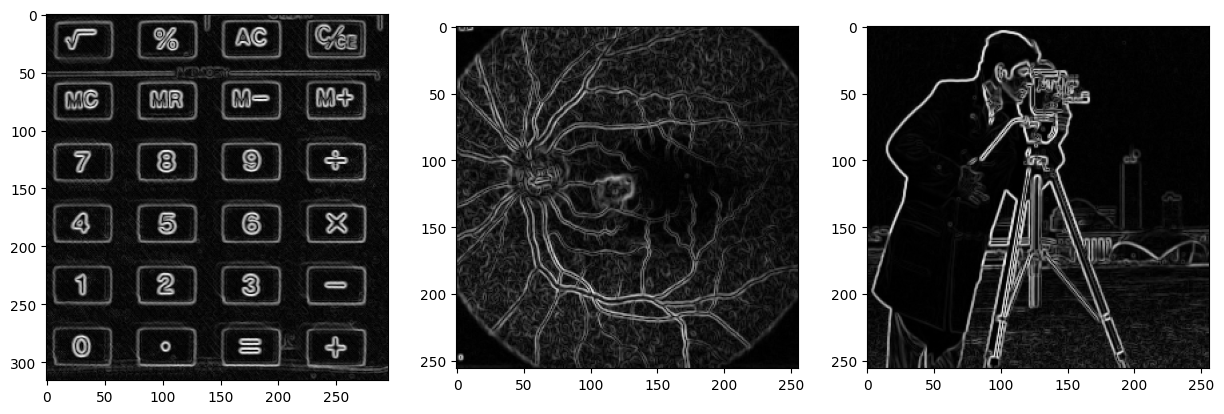

In [ ]:
# Neste exercicio, foi criada a funcao desejada usando apenas a
# formula apresentada e os ajustes feitos no exercicio anterior.
# Deste modo, chegou-se a um resultado bastante bom, conforme se
# nota abaixo.
plt.figure(figsize=(15,10))

def magSobel(img):

  img_aux = img.astype("int")

  imgv = ndimg.convolve(img_aux, Sv)
  imgv = np.abs(imgv)
  plt.imshow(imgv, cmap="gray")

  imgh = ndimg.convolve(img_aux, Sh)
  imgh = np.abs(imgh)

  img_result = np.sqrt(imgh*imgh + imgv*imgv)
  return img_result

plt.subplot(1, 3, 1)
plt.imshow(magSobel(img), cmap="gray")
plt.subplot(1, 3, 2)
plt.imshow(magSobel(img1), cmap="gray")
plt.subplot(1, 3, 3)
plt.imshow(magSobel(img2), cmap="gray")

## Parte 4 - Aprendendo filtros com CNN (opcional para EA979)

Como vimos em sala de aula, as redes neurais convolucionais (CNNs, do inglês *convolutional neural networks*) têm como base as camadas convolucionais, um banco de filtros cujos pesos são aprendidos a partir de um gabarito para predição. Para entender melhor como isso funciona, vamos praticar com redes convolucionais bem simples e visualizar como os filtros são aprendidos por elas.

Vamos utilizar um conjunto de dados composto por 60 imagens de cidades, que servirão como entradas para a nossa rede. Além das imagens originais, temos também outros dois conjuntos de imagens, obtidos após a aplicação de dois tipos de filtros diferentes nas imagens originais (Dica: ambos os filtros aplicados foram filtros vistos anteriormente neste notebook). Essas imagens filtradas servirão como nosso gabarito para que a CNN possa aprender automaticamente qual filtro foi aplicado em cada conjunto de dados, ou seja, a rede vai tentar aprender qual o filtro necessário para obter o gabarito (imagem filtrada) a partir da entrada (imagem original).

**Para mais informações sobre redes convolucionais, exemplos e boas práticas, verifique os materiais de apoio disponibilizados no classroom. Lá você vai encontrar um tutorial teórico sobre CNN, além de tutoriais práticos disponibilizados no GitHub. Recomendamos utilizar a biblioteca PyTorch, que será utilizada novamente em exercícios futuros.**

Abaixo, visualizamos uma imagem aleatória do conjunto e suas respectivas versões filtradas.

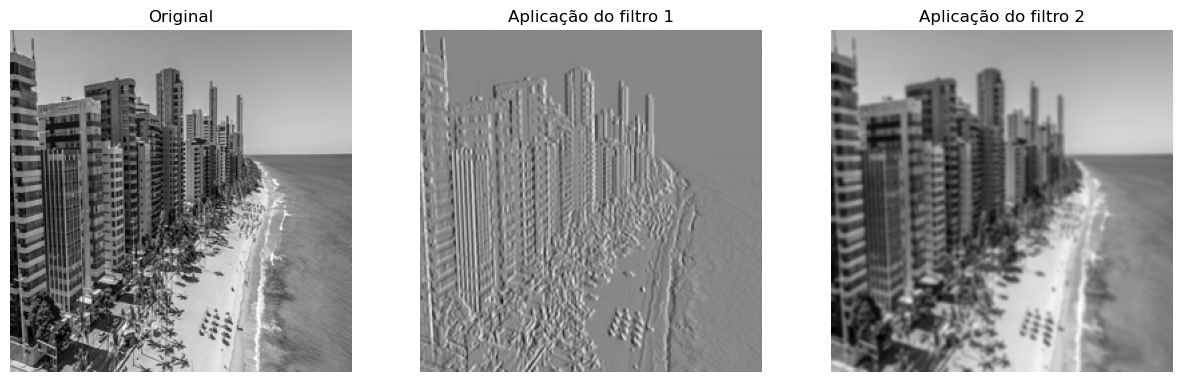

In [ ]:
path_dataset = path + 'City_images/'
selec_img = random.randint(1, 60)

img_ori = Image.open(path_dataset+'imgs_originais/'+f'{selec_img}.tif')
img_f1 = Image.open(path_dataset+'imgs_filt1/'+f'{selec_img}.tif')
img_f2 = Image.open(path_dataset+'imgs_filt2/'+f'{selec_img}.tif')

plt.figure(figsize=(15,5))
plt.subplot(131)
plt.imshow(np.array(img_ori), cmap='gray')
plt.axis('off')
plt.title('Original')
plt.subplot(132)
plt.imshow(np.array(img_f1), cmap='gray')
plt.axis('off')
plt.title('Aplicação do filtro 1')
plt.subplot(133)
plt.imshow(np.array(img_f2), cmap='gray')
plt.axis('off')
plt.title('Aplicação do filtro 2');

Para facilitar a visualização dos filtros aprendidos pela rede, vamos utilizar o código abaixo, que gera um **gif** a partir de um conjunto de arrays. Tente entender o código a partir do exemplo dado.

In [ ]:
# Criando um conjunto de arrays para exemplificar o código
array_list = []
array_inicial = np.array([[0,0,0,0,0,0,0,0,0,0,0,0]]*6, dtype='uint8')
array_list.append(array_inicial)
for i in range(12):
    tmp = array_inicial.copy()
    tmp[2:4,:i+1] = 1
    array_list.append(tmp)

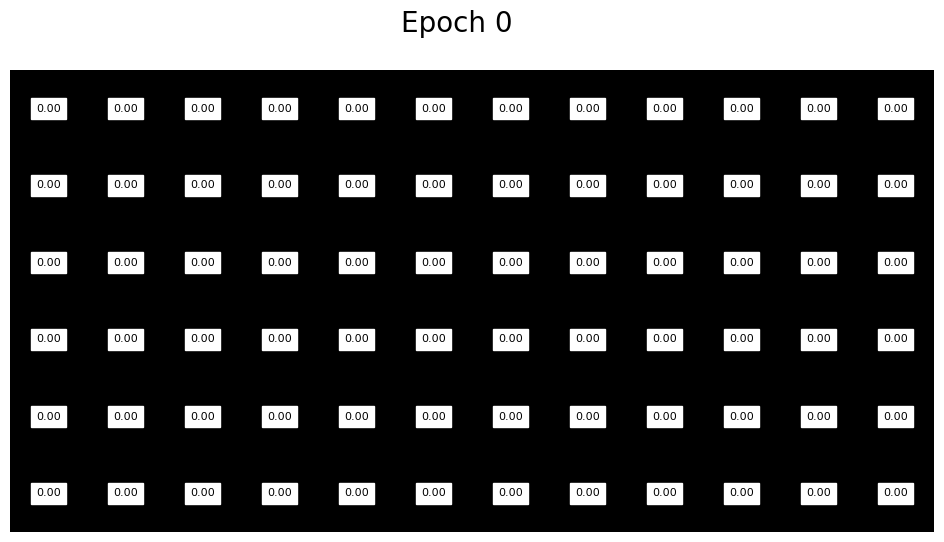

In [ ]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Gif generation
images = np.array(array_list)
vmin = images.min()
vmax = images.max()
fig = plt.figure(figsize=(12,6))

# Function to update the image and add text annotations
def update(frame):
    plt.clf()  # Clear the previous plot
    fig.suptitle("Epoch {}".format(frame), fontsize=20) # Define the title
    plt.imshow(images[frame], vmin=vmin, vmax=vmax, cmap='gray') # Generate the image
    plt.axis('off')
    # Add text annotations
    for (i, j), value in np.ndenumerate(images[frame]):
        plt.text(j, i, f'{value:.2f}', ha='center', va='center', color='black', fontsize=8, backgroundcolor='white')

# Creating the animation
anim = FuncAnimation(fig, update, frames=len(images), interval=200)
# Displaying the animation in the notebook
html = anim.to_jshtml()
HTML(html)

### Exercício 4.1

Crie uma CNN composta por apenas uma camada convolucional com kernel de tamanho 3x3, que utilize as imagens originais como entrada e tenha como "gabarito" o primeiro conjunto de imagens filtradas (**imgs_filt1**). Você precisará definir uma função de loss, um otimizador para a rede e o número de épocas para treinamento. Então, treine a rede com as imagens especificadas, acompanhando os valores de loss a cada época. Você deve armazenar em uma lista os pesos do kernel da rede a cada época do treinamento.

Após o treinamento, visualize a progressão dos pesos do kernel utilizando o código de geração de **gif** dado anteriormente. Comente os métodos utilizados e resultados obtidos. A partir do **gif** obtido, você é capaz de dizer que filtro foi utilizado para gerar o conjunto de imagens da pasta **imgs_filt1**?

In [ ]:
# Seu código aqui

### Exercício 4.2

Repita o processo realizado no exercício 5.1, mas dessa vez crie uma CNN composta por duas camadas convolucionais, a primeira com kernel de tamanho 1x5 e a segunda com kernel de tamanho 5x1. Você deve utilizar como "gabarito" o segundo conjunto de imagens filtradas (**imgs_filt2**). Armazene os pesos dos kernels da rede a cada época do treinamento em duas listas, uma para cada kernel.

Após o treinamento, visualize a progressão dos pesos de cada kernel utilizando o código de geração de **gif** dado anteriormente. Comente os métodos utilizados e resultados obtidos. A partir dos **gifs** obtidos, você é capaz de dizer que filtro foi utilizado para gerar o conjunto de imagens da pasta **imgs_filt2**?

In [ ]:
# Seu código aqui